In [1]:
import mediapipe as mp 
import cv2 
import socket
from dollarpy import Recognizer, Template, Point
import os
import numpy as np
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

In [2]:
soc = socket.socket()
hostname="localhost"# 127.0.0.1 #0.0.0.0
port=5009
soc.bind((hostname,port))
soc.listen(5)
conn , addr = soc.accept()
print("device connected")


device connected


In [3]:
def rightXY(sendd):
    directory = r"C:\Users\DELL\OneDrive\Desktop\Lab 4 - TUIO-20231029\TUIO11_NET-master\TUIO11_NET-master\bin\Debug"

    if not os.path.exists(directory):
        os.makedirs(directory)

    file_name = "right.txt"
    file_path = os.path.join(directory, file_name)
    
    string_to_save = sendd

    with open(file_path, "a") as f:
        f.writelines(string_to_save)
    print(f"The string has been saved to {file_path}.")


In [4]:
def leftXY(sendd):
    directory = r"C:\Users\DELL\OneDrive\Desktop\Lab 4 - TUIO-20231029\TUIO11_NET-master\TUIO11_NET-master\bin\Debug"

    if not os.path.exists(directory):
        os.makedirs(directory)

    file_name = "left.txt"
    file_path = os.path.join(directory, file_name)

    string_to_save = sendd

    with open(file_path, "a") as f:
        f.write(string_to_save)

    print(f"The string has been saved to {file_path}.")

In [5]:
templates=[] 
sub_templates = []

In [6]:
def getPoints(videoURL,label):
    cap = cv2.VideoCapture(videoURL)#web cam =0 , else enter filename
    # Initiate holistic model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        points = []
        left_shoulder=[]
        right_shoulder=[]
        left_elbos=[]
        right_elbos=[]
        left_wirst=[]
        right_wrist=[]
        left_pinky=[]
        right_pinky=[]
        left_index=[]
        right_index=[]
        left_hip=[]
        right_hip=[]
        
        
        m_left_shoulder=[]
        m_right_shoulder=[]
        m_left_elbos=[]
        m_right_elbos=[]
        m_left_wirst=[]
        m_right_wrist=[]
        m_left_pinky=[]
        m_right_pinky=[]
        m_left_index=[]
        m_right_index=[]
        m_left_hip=[]
        m_right_hip=[]
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolor Feed
            if ret==True:

                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False        

                results = holistic.process(image)
                
                image.flags.writeable = True   
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


                # 2. Right hand
                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                         )

                # 3. Left Hand
                mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                         mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                         )

                # 4. Pose Detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                         mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                         )
                # Export coordinates
                try:
                    # Extract Pose landmarks
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist=[]
                    for lnd in pose:
                        if(index  in [11,12,13,14,15,16,17,18,19,20,23,24]):
                            newlist.append(lnd)
                        index+=1



                    # add points of wrist , elbow and shoulder
                    left_shoulder.append(Point(newlist[0].x,newlist[0].y,1))
                    right_shoulder.append(Point(newlist[1].x,newlist[1].y,2))
                    left_elbos.append(Point(newlist[2].x,newlist[2].y,3))
                    right_elbos.append(Point(newlist[3].x,newlist[3].y,4))
                    left_wirst.append(Point(newlist[4].x,newlist[4].y,5))
                    right_wrist.append(Point(newlist[5].x,newlist[5].y,6))
                    left_pinky.append(Point(newlist[6].x,newlist[6].y,7))
                    right_pinky.append(Point(newlist[7].x,newlist[7].y,8))
                    left_index.append(Point(newlist[8].x,newlist[8].y,9))
                    right_index.append(Point(newlist[9].x,newlist[9].y,10))
                    left_hip.append(Point(newlist[10].x,newlist[10].y,11))
                    right_hip.append(Point(newlist[11].x,newlist[11].y,12))

                    m_left_shoulder.append((newlist[0].x,newlist[0].y))
                    m_right_shoulder.append((newlist[1].x,newlist[1].y))
                    m_left_elbos.append((newlist[2].x,newlist[2].y))
                    m_right_elbos.append((newlist[3].x,newlist[3].y))
                    m_left_wirst.append((newlist[4].x,newlist[4].y))
                    m_right_wrist.append((newlist[5].x,newlist[5].y))
                    m_left_pinky.append((newlist[6].x,newlist[6].y))
                    m_right_pinky.append((newlist[7].x,newlist[7].y))
                    m_left_index.append((newlist[8].x,newlist[8].y))
                    m_right_index.append((newlist[9].x,newlist[9].y))
                    m_left_hip.append((newlist[10].x,newlist[10].y))
                    m_right_hip.append((newlist[11].x,newlist[11].y))


                                        
                    



                    pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] 
                                              for landmark in newlist]).flatten())

                 
                    face = results.face_landmarks.landmark

            
                    row = pose_row




                except:
                    pass

                cv2.imshow(label, image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()
    points = left_shoulder+right_shoulder+left_elbos+right_elbos+left_wirst+right_wrist+left_pinky+right_pinky+left_index+right_index+left_hip+right_hip
    print(label)



    xs, ys = zip(*m_left_shoulder)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_shoulder)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_elbos)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    xs, ys = zip(*m_right_elbos)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_wirst)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    xs, ys = zip(*m_left_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    xs, ys = zip(*m_right_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_hip)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_hip)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    plt.gca().invert_yaxis()


    plt.show()
    return points

right


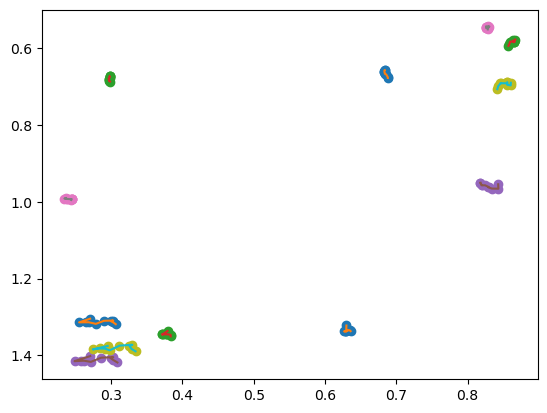

[(0.6881879568099976, 0.6772125959396362), stroke 1, (0.6882178783416748, 0.6756891012191772), stroke 1, (0.6859374046325684, 0.6680840253829956), stroke 1, (0.684025228023529, 0.6662587523460388), stroke 1, (0.6839227080345154, 0.6640671491622925), stroke 1, (0.6834774017333984, 0.6623672842979431), stroke 1, (0.683351993560791, 0.661117434501648), stroke 1, (0.68340003490448, 0.658649742603302), stroke 1, (0.6835268139839172, 0.6570510268211365), stroke 1, (0.6838863492012024, 0.6568028330802917), stroke 1, (0.2983423173427582, 0.6864780187606812), stroke 2, (0.29700425267219543, 0.6850761771202087), stroke 2, (0.29703736305236816, 0.6823689341545105), stroke 2, (0.2964499592781067, 0.6788573861122131), stroke 2, (0.2964726388454437, 0.6785665154457092), stroke 2, (0.2976612150669098, 0.6765273809432983), stroke 2, (0.29797104001045227, 0.6747785210609436), stroke 2, (0.2979505658149719, 0.6722748875617981), stroke 2, (0.2979179918766022, 0.6723654866218567), stroke 2, (0.29789274930

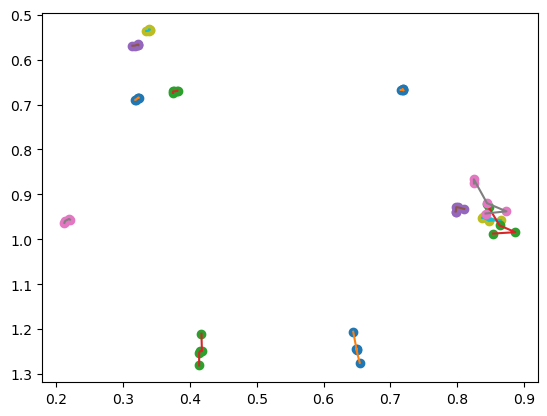

[(0.7152833938598633, 0.6675245761871338), stroke 1, (0.718407392501831, 0.6672391891479492), stroke 1, (0.7183733582496643, 0.665732741355896), stroke 1, (0.7184455990791321, 0.6655951738357544), stroke 1, (0.7194241881370544, 0.6682265400886536), stroke 1, (0.38107508420944214, 0.6694721579551697), stroke 2, (0.381586492061615, 0.6695100665092468), stroke 2, (0.37603631615638733, 0.6707580089569092), stroke 2, (0.37489402294158936, 0.6708971858024597), stroke 2, (0.3747750222682953, 0.6741805672645569), stroke 2, (0.7974109649658203, 0.938294529914856), stroke 3, (0.7980025410652161, 0.9385890364646912), stroke 3, (0.7984021902084351, 0.9285058975219727), stroke 3, (0.8010668754577637, 0.9287919402122498), stroke 3, (0.8104257583618164, 0.9323877096176147), stroke 3, (0.22066816687583923, 0.9561370015144348), stroke 4, (0.21922056376934052, 0.9547815322875977), stroke 4, (0.2137846052646637, 0.9587563276290894), stroke 4, (0.21290501952171326, 0.960691511631012), stroke 4, (0.2122919

In [7]:
#hook correct
#if res=="true":
vid = "right.mp4"
points = getPoints(vid,"right") 
tmpl_2 = Template('right', points)
templates.append(tmpl_2)
print (points)
rightXY(str(points))
    #UPPER
    #uppercut correct
vid = "left.mp4"
points = getPoints(vid,"left") 
tmpl_2 = Template('left', points)
templates.append(tmpl_2)
print (points)
leftXY(str(points))


In [8]:
soc = socket.socket()
hostname="localhost"
port=5009
soc.bind((hostname,port))
soc.listen(5)
conn , addr = soc.accept()
print("device connected")

device connected


Test


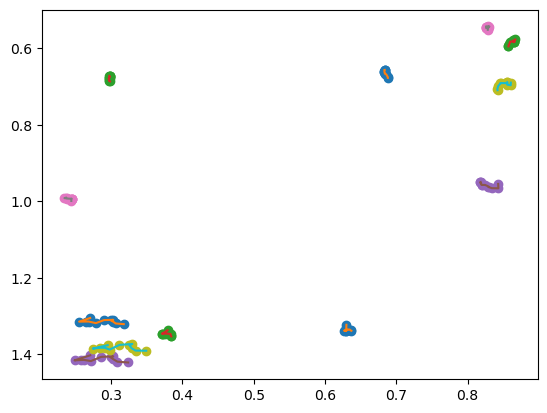

right
0.009057998657226562


In [9]:
file_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\Lab 4 - TUIO-20231029\\TUIO11_NET-master\\TUIO11_NET-master\\bin\\Debug\\test.txt"
#video_source = "http://192.168.1.37:8080/video"
#points = getPoints(video_source, "Test") 
vid = "right.mp4"
points = getPoints(vid, "Test") 
#vid = 0
#points = getPoints(vid,"test") 
import time 
start = time.time()
recognizer = Recognizer(templates)
result = recognizer.recognize(points)
end = time.time()
duration1=end-start
if result is not None:
    if result[0] is not None and ("right" in result[0]):
        print("right")
        with open(file_path, "a") as file:
            file.write("right" + "\n")
        start = time.time()
        recognizer = Recognizer(sub_templates)
        result = recognizer.recognize(points)
        end = time.time()
        duration2 = end-start
    elif result[0] is not None and ("left" in result[0]):
        print("left")
        with open(file_path, "a") as file:
            file.write("left" + "\n")
        start = time.time()
        recognizer = Recognizer(sub_templates)
        result = recognizer.recognize(points)
        end = time.time()
        duration2 = end-start
    fullDuration = duration1+duration2
    print(fullDuration)

In [ ]:
soc = socket.socket()
hostname="localhost"
port=5009
soc.bind((hostname,port))
soc.listen(5)
conn , addr = soc.accept()
print("device connected")